## Introduction

This is a conversion of the Fortran code from [the FORTRAN code](http://www.sklogwiki.org/SklogWiki/index.php/FORTRAN_code_for_the_Kolafa_and_Nezbeda_equation_of_state)
for the Kolafa and Nezbeda equation of state for the Lennard-Jones fluid.
It provides the following Python source code for the functions described in J. Kolafa, I. Nezbeda, Fluid Phase Equil. 100 (1994), 1.

    ALJ(T,rho)...Helmholtz free energy (including the ideal term)
    PLJ(T,rho)...Pressure
    ULJ(T,rho)...Internal energy
    
I have mainly converted the pressure function. It is worth recalling that all standard float operations in Python are double precision.


## Imports

In [56]:
import numpy as np
PI = np.pi
dlog = np.log
dsqrt = np.sqrt
exp= np.exp

## ALJ(T,rho)

In [57]:
def ALJ(T, rho):
    """
    Helmholtz free energy (including the ideal term)
    """
    eta = PI / 6. * rho * (dC(T))**3
    x = (dlog(rho) + betaAHS(eta) +
         rho * BC(T) / exp(gammaBH(T) * rho**2)) * T + DALJ(T, rho)
    return x

## ALJres(T,rho)

In [58]:
def ALJres(T, rho):
    """Helmholtz free energy (without ideal term)"""
    eta = PI / 6. * rho * (dC(T))**3
    x = (betaAHS(eta) + rho * BC(T) / exp(gammaBH(T) * rho**2)) * T + DALJ(
        T, rho)
    return x

## PLJ(T,rho)

In [71]:
def PLJ(T, rho):
    """pressure"""
    eta = PI / 6. * rho * (dC(T))**3
    sum = ((2.01546797 * 2 + rho * ((-28.17881636) * 3 + rho *
                                    (28.28313847 * 4 + rho *
                                     (-10.42402873) * 5))) +
           ((-19.58371655) * 2 + rho * (+75.62340289 * 3 + rho *
                                        ((-120.70586598) * 4 + rho *
                                         (+93.92740328 * 5 + rho *
                                          (-27.37737354) * 6)))) / dsqrt(T) +
           ((29.34470520 * 2 + rho *
             ((-112.35356937) * 3 + rho *
              (+170.64908980 * 4 + rho *
               ((-123.06669187) * 5 + rho * 34.42288969 * 6)))) +
            ((-13.37031968) * 2 + rho *
             (65.38059570 * 3 + rho *
              ((-115.09233113) * 4 + rho *
               (88.91973082 * 5 + rho *
                (-25.62099890) * 6)))) / T) / T) * rho**2
    x = ((zHS(eta) + BC(T) / exp(gammaBH(T) * rho**2) * rho *
          (1 - 2 * gammaBH(T) * rho**2)) * T + sum) * rho
    return x

def plj(rho,t=1.):
    return PLJ(t,rho)

In [64]:
def dC(T):
    sT = dsqrt(T)
    return -0.063920968 * dlog(
        T) + 0.011117524 / T - 0.076383859 / sT + 1.080142248 + 0.000693129 * sT

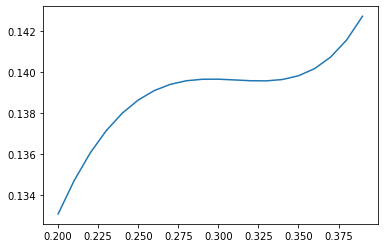

In [60]:
# import matplotlib.pyplot as plt
# r = np.arange(.2, .4,.01)
# p = plj(r,t=1.338)
# plt.plot(r,p)

## zHS(eta)

In [61]:
def zHS(eta):
    return (1+eta*(1+eta*(1-eta/1.5*(1+eta)))) / (1-eta)**3

## BC( T)

In [62]:
def BC(T):
    isT = 1 / dsqrt(T)
    x = (((((-0.58544978 * isT + 0.43102052) * isT + .87361369) * isT -
           4.13749995) * isT + 2.90616279) * isT - 7.02181962) / T + 0.02459877
    return x

## gammaBH(X)

In [63]:
def gammaBH(X):
    return 1.92907278


## dC(T)

In [65]:
# C/* internal energy */
#       DOUBLE PRECISION FUNCTION ULJ( T, rho)
#       implicit double precision (a-h,o-z)
#        data pi /3.141592654d0/
#       dBHdT=dCdT(T)
#       dB2BHdT=BCdT(T)
#       d=dC(T)
#       eta=PI/6. *rho*d**3
#       sum= ((2.01546797+rho*(
#  (-28.17881636)+rho*(
#  +28.28313847+rho*
#  (-10.42402873))))
#  + (-19.58371655*1.5+rho*(
#  75.62340289*1.5+rho*(
#  (-120.70586598)*1.5+rho*(
#  93.92740328*1.5+rho*
#  (-27.37737354)*1.5))))/dsqrt(T)
#  + ((29.34470520*2+rho*(
#  -112.35356937*2+rho*(
#   170.64908980*2+rho*(
#  -123.06669187*2+rho*
#  34.42288969*2)))) +
#  (-13.37031968*3+rho*(
#   65.38059570*3+rho*(
#   -115.09233113*3+rho*(
#  88.91973082*3+rho*
#  (-25.62099890)*3))))/T)/T) *rho*rho
#       ULJ = 3*(zHS(eta)-1)*dBHdT/d
#  +rho*dB2BHdT/exp(gammaBH(T)*rho**2) +sum
#       RETURN
#       END

In [66]:
#       DOUBLE PRECISION FUNCTION betaAHS( eta )
#       implicit double precision (a-h,o-z)
#       betaAHS = dlog(1-eta)/0.6
#   + eta*( (4.0/6*eta-33.0/6)*eta+34.0/6 ) /(1.-eta)**2
#       RETURN
#       END
# C /* hBH diameter */
#       DOUBLE PRECISION FUNCTION dLJ(T)
#       implicit double precision (a-h,o-z)
#       DOUBLE PRECISION IST
#       isT=1/dsqrt(T)
#       dLJ = ((( 0.011117524191338 *isT-0.076383859168060)
#  *isT)*isT+0.000693129033539)/isT+1.080142247540047
#  +0.127841935018828*dlog(isT)
#       RETURN
#       END

In [67]:
#       DOUBLE PRECISION FUNCTION BCdT( T)
#       implicit double precision (a-h,o-z)
#       DOUBLE PRECISION iST
#       isT=1/dsqrt(T)
#       BCdT = ((((-0.58544978*3.5*isT+0.43102052*3)*isT
#   +0.87361369*2.5)*isT-4.13749995*2)*isT
#   +2.90616279*1.5)*isT-7.02181962
#       RETURN
#       END

In [68]:
#       DOUBLE PRECISION FUNCTION dCdT( T)
#       implicit double precision (a-h,o-z)
#       sT=dsqrt(T)
#       dCdT =   0.063920968*T+0.011117524+(-0.5*0.076383859
#    -0.5*0.000693129*T)*sT
#       RETURN
#       END

In [69]:
#       DOUBLE PRECISION FUNCTION DALJ(T,rho)
#       implicit double precision (a-h,o-z)
#       DALJ = ((+2.01546797+rho*(-28.17881636
#  +rho*(+28.28313847+rho*(-10.42402873))))
#  +(-19.58371655+rho*(75.62340289+rho*((-120.70586598)
#  +rho*(93.92740328+rho*(-27.37737354)))))/dsqrt(T)
#  + ( (29.34470520+rho*((-112.35356937)
#  +rho*(+170.64908980+rho*((-123.06669187)
#  +rho*34.42288969))))
#  +(-13.37031968+rho*(65.38059570+
#  rho*((-115.09233113)+rho*(88.91973082
#  +rho* (-25.62099890)))))/T)/T) *rho*rho
#       RETURN
#       END